In [7]:
import pandas as pd
import numpy as np

In [8]:
fruits = pd.read_csv("../Data/fruits.csv")
fruits.drop('Unnamed: 0',axis=1, inplace=True)
fruits.head()

,length,weight,name
0,25.4,242.0,apple
1,26.3,290.0,apple
2,26.5,340.0,apple
3,29.0,363.0,apple
4,29.0,430.0,apple


In [9]:
fruits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   length  49 non-null     float64
 1   weight  49 non-null     float64
 2   name    49 non-null     object 
dtypes: float64(2), object(1)
memory usage: 1.3+ KB


> fruits는 35개의 사과와 14개의 딸기 데이터로 구성되어 있음

In [10]:
# 사과 정보 불러오기

apple = fruits[0:35]
apple.tail()

,length,weight,name
30,38.5,920.0,apple
31,38.5,955.0,apple
32,39.5,925.0,apple
33,41.0,975.0,apple
34,41.0,950.0,apple


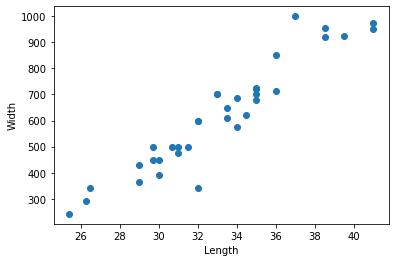

In [11]:
# apple에 대한 산포도 그리기
import matplotlib.pyplot as plt

plt.scatter(
        apple.length,
        apple.weight,
    )
plt.xlabel('Length')
plt.ylabel('Width')
plt.show()

In [12]:
# 딸기 정보 불러오기

berry = fruits[35:]
berry.head()

,length,weight,name
35,9.8,6.7,berry
36,10.5,7.5,berry
37,10.6,7.0,berry
38,11.0,9.7,berry
39,11.2,9.8,berry


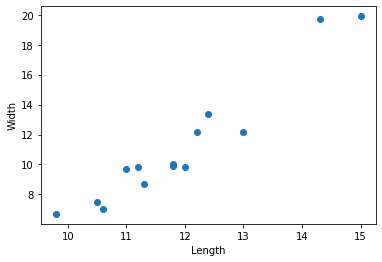

In [13]:
# berry에 대한 산포도 그리기

plt.scatter(
        berry.length,
        berry.weight,
    )
plt.xlabel('Length')
plt.ylabel('Width')
plt.show()

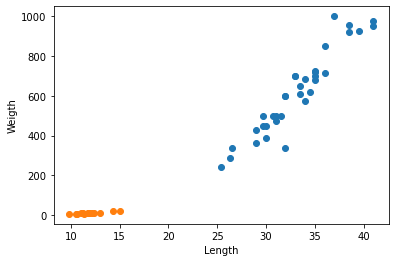

In [14]:
# 2개의 DataSet을 산포도로 한꺼번에 비교하기
plt.scatter(apple.length, apple.weight)
plt.scatter(berry.length, berry.weight)

plt.xlabel('Length')
plt.ylabel('Weigth')
plt.show()

---
## Feature Data와 Target Data의 분리

In [15]:
# Feature Data

fruitsData = fruits[['length', 'weight']]
fruitsData.head()

,length,weight
0,25.4,242.0
1,26.3,290.0
2,26.5,340.0
3,29.0,363.0
4,29.0,430.0


In [16]:
# Target Data

fruitsTarget = fruits.name
fruitsTarget.head()

0    apple
1    apple
2    apple
3    apple
4    apple
Name: name, dtype: object

---
## 최근접이웃(KNN : K Nearest Neighors) 분류알고리즘 사용 
- 지도학습 주변에 있는 값을 몇개로 할거냐? => k의 갯수(항상 홀수로 씀)

![](../Data/knn.png)
![](../Data/위치.png)

<img src="../Data/위치.png" width=300 height=300 >
<img src="../Data/knn.png" width=300 height=300 /> <br>
위같이 markdown에서 이미지를 보여줄시엔 visual studio에서 같은 폴더로 한번에 띄워야한다.

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
# instance생성
kn = KNeighborsClassifier() # n_neighbors = 5 / 보통은 홀수로 입력 <-- Hyper Parameter

In [19]:
# 학습시키기
kn.fit(fruitsData, fruitsTarget)

KNeighborsClassifier()

In [21]:
# 정확성 확인하기
kn.score(fruitsData, fruitsTarget)


1.0

> 문제와 답을 다 알려주고 정확성을 확인했더니 바로 100점이 나왔다. 근데 좀..

### 예측해 보기
길이가 30cm이고 무게가 600g인 과일은 무엇일까요?

In [25]:
kn.predict([[30, 600]])

array(['apple'], dtype=object)

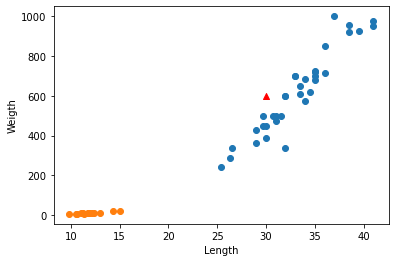

In [28]:
# 산포도로 예측 범위 확인하기

plt.scatter(apple.length, apple.weight)
plt.scatter(berry.length, berry.weight)
# 예측하고 싶은 값을 marker로 표시해준다.
plt.scatter(30, 600, marker='^', c = 'red')

plt.xlabel('Length')
plt.ylabel('Weigth')
plt.show()